### This script contains the following points:
Note: Corresponding steps for exercise task shown as (Step x)

#### 1. (Step 1 revisited) Importing libraries, defining project path, and importing "orders_products_all_flagged_2.pkl", "departments_wrangled.csv", and creating "df_non_food"
#### 2. (Step 8 + 9) A. Compare your customer profiles with regions (with visualizations). 
- a. Region by Income
- b. Region by Generation
- c. Region by Family Status
- d. Region by Count of Dependants
- e. Income by Generation
- f. Income by Family Status
- g. Income by Count of Dependants
- h. Generation by Family Status
- i. Generation by Count of Dependants
- j. Family Status by Count of Dependants

#### 3. (Step 8 + 9) B. Compare your customer profiles with departments (with visualizations).
- a. Determining most popular departments (all generations)
- b. Gen Z: Popular Departments + Products, and Ordering Habits
- c. Millennial: Popular Departments + Products, and Ordering Habits
- d. Gen X: Popular Departments + Products, and Ordering Habits
- e. Boomers and Older: Popular Departments + Products, and Ordering Habits

#### 4. Additional review of price variations based on day of week and income category



## 1. (Step 1 revisited) Importing libraries, defining project path, and importing "orders_products_all_flagged.pkl"

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path
path = r'C:\Users\prena\03-2023 Instacart Basket Analysis'

In [3]:
# Importing orders_products_all.pkl dataset
ords_prods_all_flagged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_flagged_2.pkl'))

In [4]:
# Importing departments_wrangled.csv dataset
depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [5]:
depts.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [6]:
# Set display to max columns for when we want to review the head() or tail()
pd.set_option('display.max_columns', None)

In [7]:
# Checking ords_prods_all to see all column names (for reference)
ords_prods_all_flagged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,_merge_2,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spend_flag,median_days_since_last_order,order_freq_flag,gender,state,age,date_joined,dependants_count,fam_status,income,_merge_3,region,low_activity?,gen_flag,income_flag,food_bev?
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,N,Mill,Low Income,Y
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,N,Mill,Low Income,Y
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,N,Mill,Low Income,Y
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,N,Mill,Low Income,Y
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,N,Mill,Low Income,Y


In [8]:
#Defining subset dataframe for "food_bev?" = N (non-food and non-beverage) analysis
df_non_food = ords_prods_all_flagged[ords_prods_all_flagged['food_bev?']== 'N']

In [9]:
# Frequency of departments in non-food and non-bev df 
df_non_food['department_id'].value_counts()

17    699857
11    424306
18    410392
8      93060
2      34411
Name: department_id, dtype: int64

## 2. (Step 8 + 9) A. Compare your customer profiles with regions (with visualizations).

### (a) Region by Income

In [10]:
# Creating crosstab to analyze income categories by region
ct_income_region = pd.crosstab(ords_prods_all_flagged['region'], ords_prods_all_flagged['income_flag'], dropna = False)

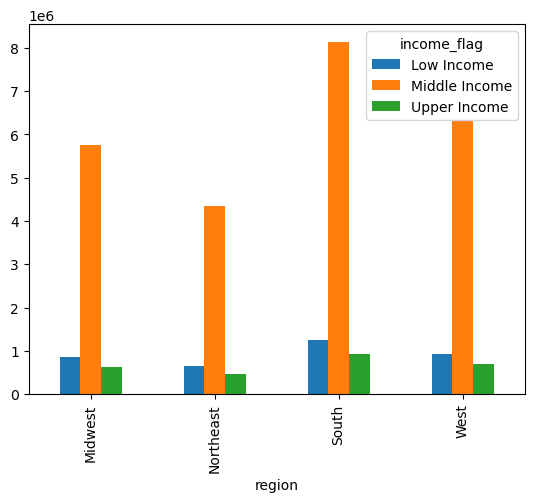

In [11]:
bar_income_region = ct_income_region.plot.bar()

In [12]:
# Export bar chart into project folder
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'a_bar_income_region.png'))

### (b) Region by Generation

In [13]:
# Creating crosstab to analyze generations by region
ct_gen_region = pd.crosstab(ords_prods_all_flagged['region'], ords_prods_all_flagged['gen_flag'], dropna = False)

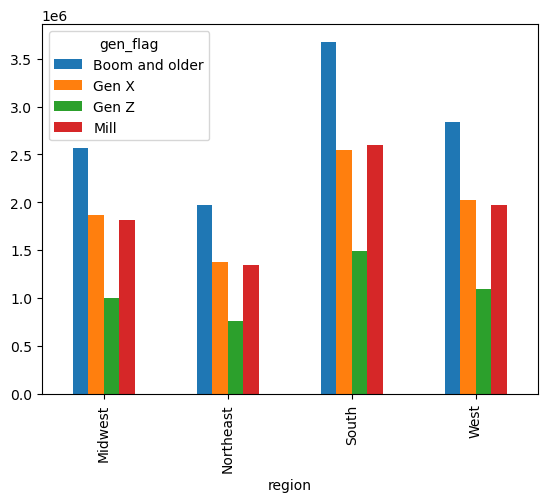

In [14]:
bar_gen_region = ct_gen_region.plot.bar()

In [15]:
# Export bar chart into project folder
bar_gen_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'b_bar_gen_region.png'))

### (c) Region by Family Status

In [16]:
# Creating crosstab to analyze family status by region
ct_fam_status_region = pd.crosstab(ords_prods_all_flagged['region'], ords_prods_all_flagged['fam_status'], dropna = False)

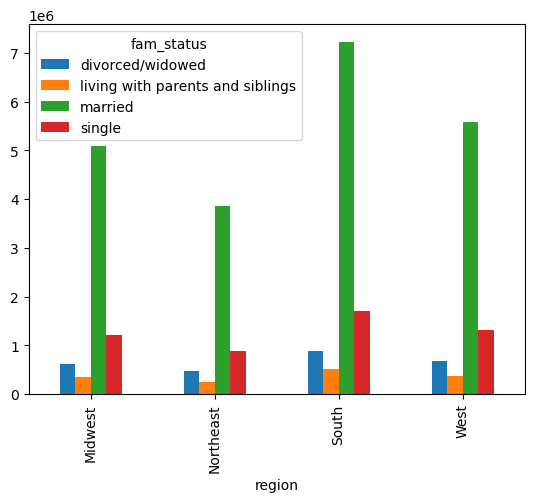

In [17]:
bar_fam_status_region = ct_fam_status_region.plot.bar()

In [18]:
# Export bar chart into project folder
bar_fam_status_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'c_bar_fam_status_region.png'))

### (d) Region by Number of Dependants

In [19]:
# Creating crosstab to analyze dependants by region
ct_deps_region = pd.crosstab(ords_prods_all_flagged['dependants_count'], ords_prods_all_flagged['region'], dropna = False)

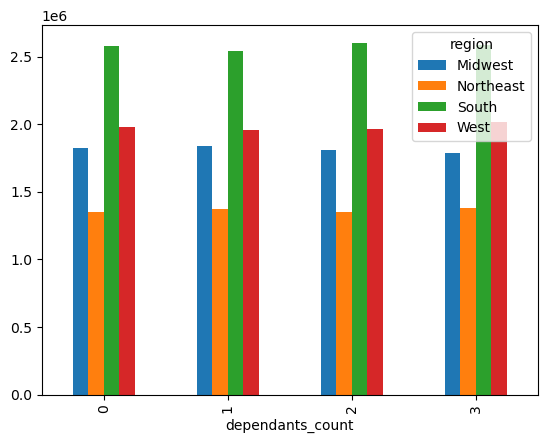

In [20]:
bar_deps_region = ct_deps_region.plot.bar()

In [21]:
# Export bar chart into project folder
bar_deps_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'd_bar_deps_region.png'))

### (e) Income by Generation

In [22]:
# Creating crosstab to analyze income categories by generation
ct_income_gen = pd.crosstab(ords_prods_all_flagged['income_flag'], ords_prods_all_flagged['gen_flag'], dropna = False)

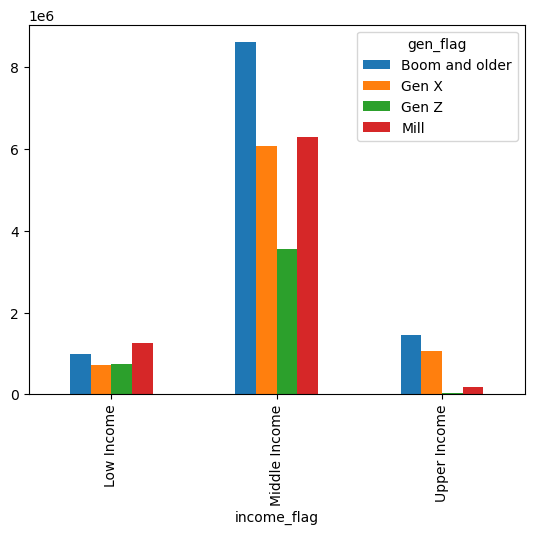

In [23]:
bar_income_gen = ct_income_gen.plot.bar()

In [24]:
# Export bar chart into project folder
bar_income_gen.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'e_bar_income_gen.png'))

### (f) Income by Family Status

In [25]:
# Creating crosstab to analyze income categories by fam status
ct_income_fam_status = pd.crosstab(ords_prods_all_flagged['income_flag'], ords_prods_all_flagged['fam_status'], dropna = False)

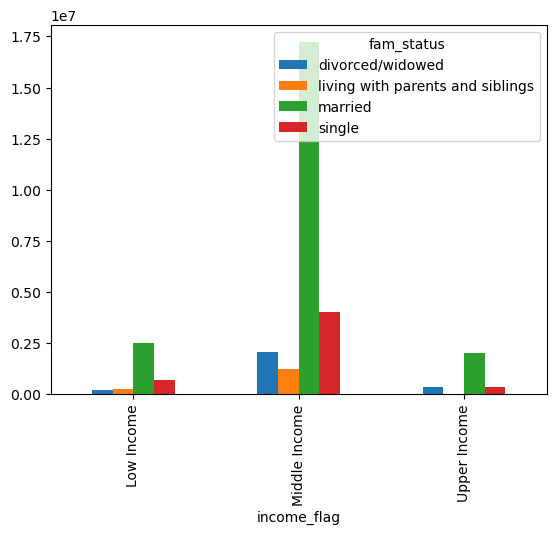

In [26]:
bar_income_fam_status = ct_income_fam_status.plot.bar()

In [27]:
# Export bar chart into project folder
bar_income_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'f_bar_income_fam_status.png'))

### (g) Income by Dependants

In [28]:
# Creating crosstab to analyze income categories by fam status
ct_income_dep = pd.crosstab(ords_prods_all_flagged['dependants_count'], ords_prods_all_flagged['income_flag'], dropna = False)

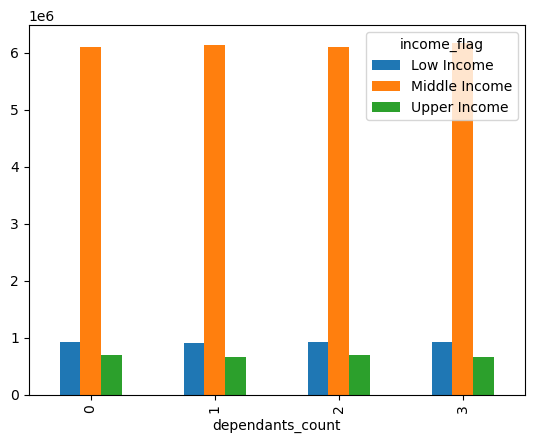

In [29]:
bar_income_dep = ct_income_dep.plot.bar()

In [30]:
# Export bar chart into project folder
bar_income_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'g_bar_income_dep.png'))

### (h) Family Status by Generation

In [31]:
# Creating crosstab to analyze family status by generation
ct_fam_gen = pd.crosstab(ords_prods_all_flagged['gen_flag'], ords_prods_all_flagged['fam_status'], dropna = False)

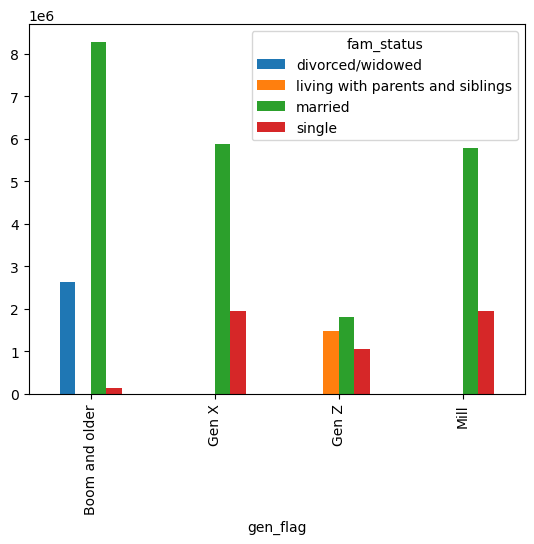

In [32]:
# Creating bar chart to analyze family status by generation
bar_fam_gen = ct_fam_gen.plot.bar()

In [33]:
# Export bar chart into project folder
bar_fam_gen.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'h_bar_fam_gen.png'))

### (i) Generation by Count of Dependants

In [34]:
# Creating crosstab to analyze family status by generation
ct_gen_dep = pd.crosstab(ords_prods_all_flagged['dependants_count'], ords_prods_all_flagged['gen_flag'], dropna = False)

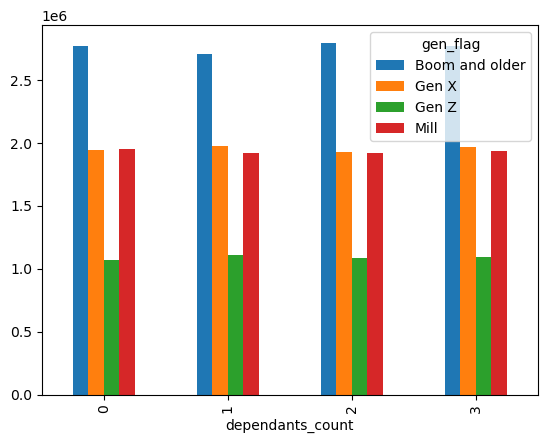

In [35]:
# Creating bar chart to analyze family status by generation
bar_gen_dep = ct_gen_dep.plot.bar()

In [36]:
# Export bar chart into project folder
bar_gen_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'i_bar_gen_dep.png'))

### (j) Family Status by Count of Dependants

In [37]:
# Creating crosstab to analyze family status by generation
ct_fam_dep = pd.crosstab(ords_prods_all_flagged['dependants_count'], ords_prods_all_flagged['fam_status'], dropna = False)

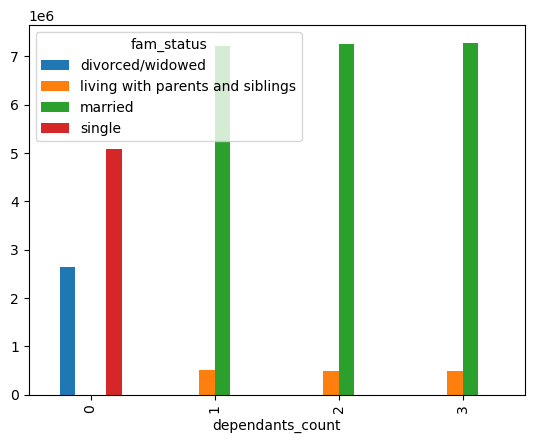

In [38]:
bar_fam_dep = ct_fam_dep.plot.bar()

In [39]:
# Export bar chart into project folder
bar_fam_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'j_bar_fam_dep.png'))

## 3. (Step 8 + 9) B. Compare your customer profiles with departments (with visualizations).

### (a) Determining most popular departments (all generations)

In [40]:
# Frequency of orders by department
pop_depts = ords_prods_all_flagged['department_id'].value_counts().rename_axis('department_id').reset_index(name='counts')

In [41]:
pop_depts.shape

(21, 2)

In [42]:
# Inner join merge 'pop_depts' with 'depts'
df_pop_depts = pop_depts.merge(depts, on = 'department_id', indicator = True)

In [43]:
# Departments with the highest order counts
df_pop_depts.head()

,department_id,counts,department,_merge
0,4,9079273,produce,both
1,16,5172305,dairy eggs,both
2,19,2766406,snacks,both
3,7,2571901,beverages,both
4,1,2121731,frozen,both


In [44]:
# Departments with the lowest order counts
df_pop_depts.tail()

,department_id,counts,department,_merge
16,5,144627,alcohol,both
17,8,93060,pets,both
18,21,64768,missing,both
19,2,34411,other,both
20,10,33451,bulk,both


### (b) Gen Z: Popular Departments + Products, and Ordering Habits

#### (i) Reviewing overall popular departments + products for Gen Z:

In [45]:
df_gen_z = ords_prods_all_flagged[ords_prods_all_flagged['gen_flag']== 'Gen Z']

In [46]:
# Frequency of orders by department for Gen Z
pop_depts_gen_z = df_gen_z['department_id'].value_counts().rename_axis('department_id').reset_index(name='counts')

In [47]:
# Inner join merge 'pop_depts_gen_z' with 'depts'
df_pop_depts_z = pop_depts_gen_z.merge(depts, on = 'department_id', indicator = True)

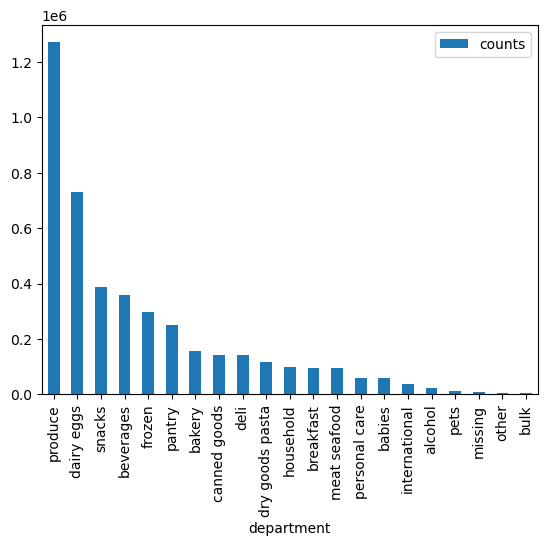

In [48]:
bar_pop_depts_gen_z = df_pop_depts_z.plot.bar(x='department', y='counts')

In [49]:
# Export bar chart into project folder
bar_pop_depts_gen_z.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'b_bar_pop_depts_gen_z.png'))

In [50]:
df_pop_prods_gen_z = df_gen_z['product_name'].value_counts()

In [51]:
df_pop_prods_gen_z.head(5)

Banana                    64754
Bag of Organic Bananas    50925
Organic Strawberries      35954
Organic Baby Spinach      32124
Organic Hass Avocado      28075
Name: product_name, dtype: int64

#### (ii) Reviewing departments and products not food and beverage related:

In [52]:
df_gen_z_other = df_non_food[df_non_food['gen_flag']== 'Gen Z']

In [53]:
# Frequency of orders by department for Gen Z (non-food + non-bev items)
pop_depts_gen_z_other = df_gen_z_other['department_id'].value_counts().rename_axis('department_id').reset_index(name='counts')

In [54]:
# Inner join merge 'pop_depts_gen_z_other' with 'depts'
df_pop_depts_z_other = pop_depts_gen_z_other.merge(depts, on = 'department_id', indicator = True)

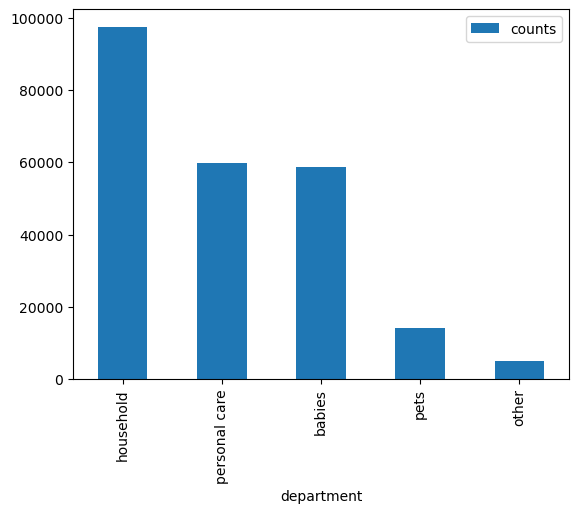

In [55]:
bar_pop_depts_gen_z_other = df_pop_depts_z_other.plot.bar(x='department', y='counts')

In [56]:
# Export bar chart into project folder
bar_pop_depts_gen_z_other.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'b_bar_pop_depts_gen_z_other.png'))

In [57]:
df_pop_prods_gen_z_other = df_gen_z_other['product_name'].value_counts()

In [58]:
df_pop_prods_gen_z_other.head()

100% Recycled Paper Towels                          3790
Sustainably Soft Bath Tissue                        2461
Aluminum Foil                                       1446
Baby Food Stage 2 Blueberry Pear & Purple Carrot    1293
Natural Free & Clear Dish Liquid                    1278
Name: product_name, dtype: int64

#### (iii) Looking at ordering habits (day of week, hour of day, and price range of products)

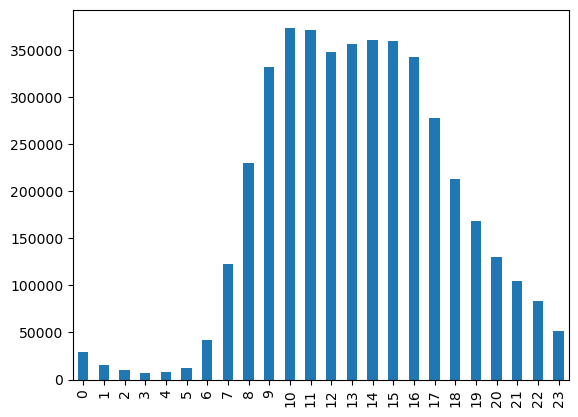

In [59]:
# Frequency of order hour of day ('order_hour_of_day')
bar_genz_hour = df_gen_z['order_hour_of_day'].value_counts().sort_index().plot.bar()

In [60]:
# Export bar chart into project folder
bar_genz_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'b_bar_genz_hour.png'))

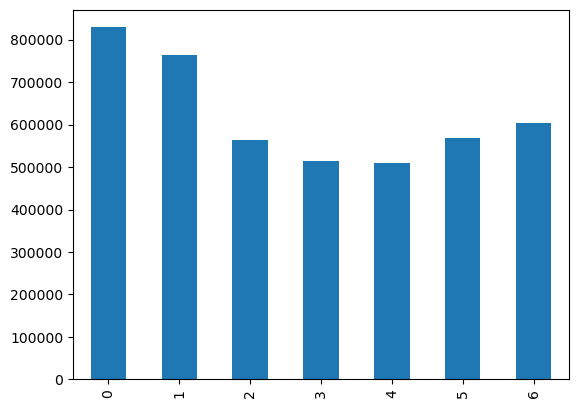

In [61]:
# Frequency of day of week ('order_day_of_week')
bar_genz_day = df_gen_z['order_day_of_week'].value_counts().sort_index().plot.bar()

In [62]:
# Export bar chart into project folder
bar_genz_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'b_bar_genz_day.png'))

### (c) Millennial: Popular Departments + Products, and Ordering Habits

#### (i) Reviewing overall popular departments + products for Millennials:

In [63]:
df_mill = ords_prods_all_flagged[ords_prods_all_flagged['gen_flag']== 'Mill']

In [64]:
# Frequency of orders by department for Millennials
pop_depts_mill = df_mill['department_id'].value_counts().rename_axis('department_id').reset_index(name='counts')

In [65]:
# Inner join merge 'pop_depts_mill' with 'depts'
df_pop_depts_mill = pop_depts_mill.merge(depts, on = 'department_id', indicator = True)

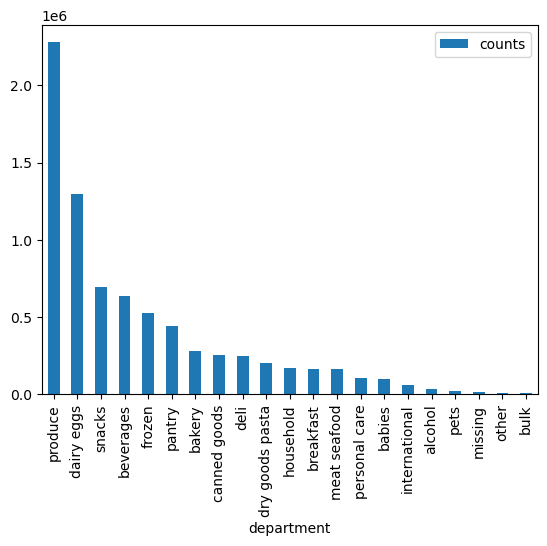

In [66]:
bar_pop_depts_mill = df_pop_depts_mill.plot.bar(x='department', y='counts')

In [67]:
# Export bar chart into project folder
bar_pop_depts_mill.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'c_bar_pop_depts_mill.png'))

In [68]:
df_pop_prods_mill = df_mill['product_name'].value_counts()

In [69]:
df_pop_prods_mill.head(5)

Banana                    112723
Bag of Organic Bananas     91374
Organic Strawberries       64211
Organic Baby Spinach       58658
Organic Hass Avocado       52280
Name: product_name, dtype: int64

#### (ii) Reviewing departments and products not food and beverage related:

In [70]:
df_mill_other = df_non_food[df_non_food['gen_flag']== 'Mill']

In [71]:
# Frequency of orders by department for Millennials (non-food + non-bev items)
pop_depts_mill_other = df_mill_other['department_id'].value_counts().rename_axis('department_id').reset_index(name='counts')

In [72]:
# Inner join merge 'pop_depts_mill_other' with 'depts'
df_pop_mill_other = pop_depts_mill_other.merge(depts, on = 'department_id', indicator = True)

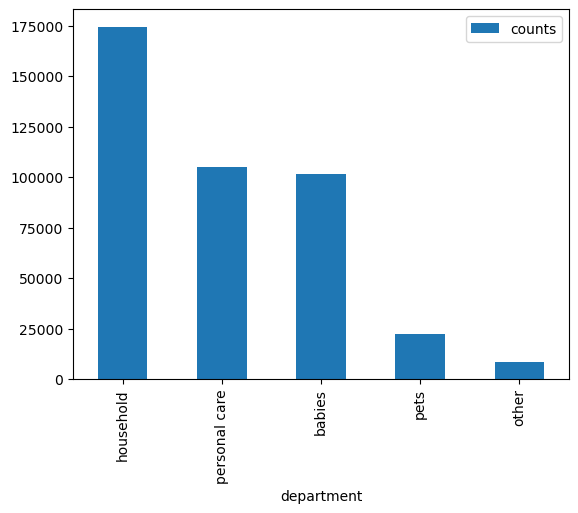

In [73]:
bar_pop_depts_mill_other = df_pop_mill_other.plot.bar(x='department', y='counts')

In [74]:
# Export bar chart into project folder
bar_pop_depts_mill_other.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'c_bar_pop_depts_mill_other.png'))

In [75]:
df_pop_prods_mill_other = df_mill_other['product_name'].value_counts()

In [76]:
df_pop_prods_mill_other.head()

100% Recycled Paper Towels                          6894
Sustainably Soft Bath Tissue                        4427
Aluminum Foil                                       2503
Baby Food Stage 2 Blueberry Pear & Purple Carrot    2319
Spinach Peas & Pear Stage 2 Baby Food               2161
Name: product_name, dtype: int64

#### (iii) Looking at ordering habits (day of week and hour of day)

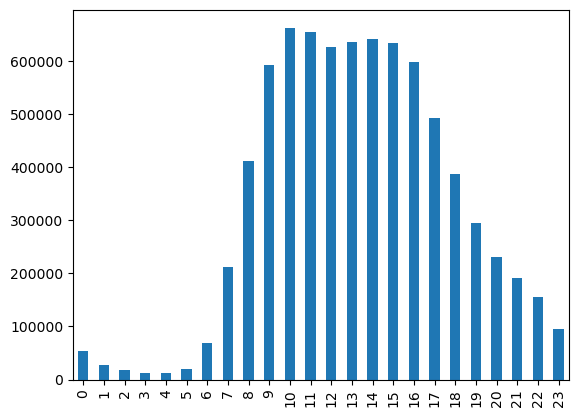

In [77]:
# Frequency of order hour of day ('order_hour_of_day')
bar_mill_hour = df_mill['order_hour_of_day'].value_counts().sort_index().plot.bar()

In [78]:
# Export bar chart into project folder
bar_mill_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'c_bar_mill_hour.png'))

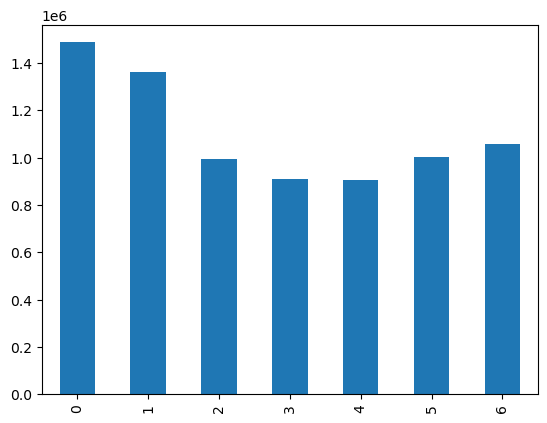

In [79]:
# Frequency of day of week ('order_day_of_week')
bar_mill_day = df_mill['order_day_of_week'].value_counts().sort_index().plot.bar()

In [80]:
# Export bar chart into project folder
bar_mill_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'c_bar_mill_day.png'))

### (d) Gen X: Popular Departments + Products

#### (i) Reviewing overall popular departments + products for Gen X:

In [81]:
df_gen_x = ords_prods_all_flagged[ords_prods_all_flagged['gen_flag']== 'Gen X']

In [82]:
# Frequency of orders by department for Millennials
pop_depts_gen_x = df_gen_x['department_id'].value_counts().rename_axis('department_id').reset_index(name='counts')

In [83]:
# Inner join merge 'pop_depts_mill' with 'depts'
df_pop_depts_gen_x = pop_depts_gen_x.merge(depts, on = 'department_id', indicator = True)

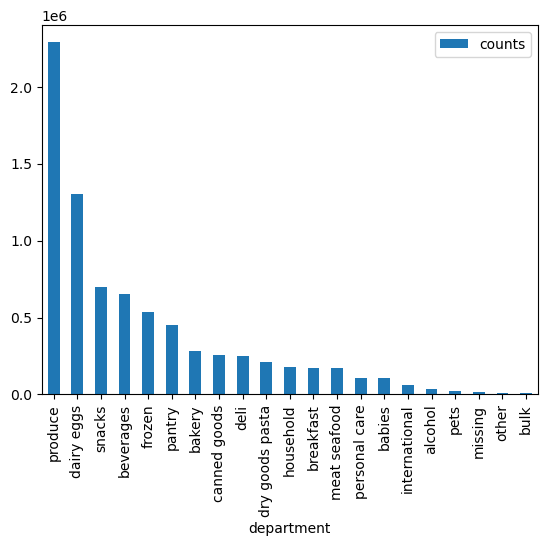

In [84]:
bar_pop_depts_gen_x = df_pop_depts_gen_x.plot.bar(x='department', y='counts')

In [85]:
# Export bar chart into project folder
bar_pop_depts_gen_x.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'd_bar_pop_depts_gen_x.png'))

In [86]:
df_pop_prods_gen_x = df_gen_x['product_name'].value_counts()

In [87]:
df_pop_prods_gen_x.head(5)

Banana                    115007
Bag of Organic Bananas     92598
Organic Strawberries       63744
Organic Baby Spinach       58801
Organic Hass Avocado       51906
Name: product_name, dtype: int64

#### (ii) Reviewing departments and products not food and beverage related:

In [88]:
df_genx_other = df_non_food[df_non_food['gen_flag']== 'Gen X']

In [89]:
# Frequency of orders by department for Gen X (non-food + non-bev items)
pop_depts_genx_other = df_genx_other['department_id'].value_counts().rename_axis('department_id').reset_index(name='counts')

In [90]:
# Inner join merge 'pop_depts_genx_other' with 'depts'
df_pop_genx_other = pop_depts_genx_other.merge(depts, on = 'department_id', indicator = True)

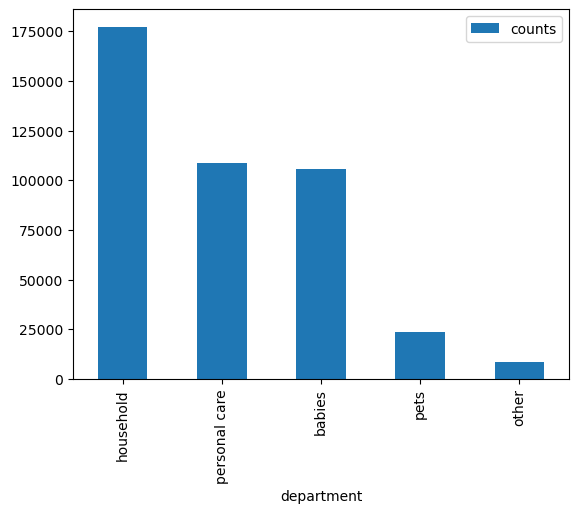

In [91]:
bar_pop_depts_genx_other = df_pop_genx_other.plot.bar(x='department', y='counts')

In [92]:
# Export bar chart into project folder
bar_pop_depts_genx_other.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'd_bar_pop_depts_genx_other.png'))

In [93]:
df_pop_prods_genx_other = df_genx_other['product_name'].value_counts()

In [94]:
df_pop_prods_genx_other.head()

100% Recycled Paper Towels                          6659
Sustainably Soft Bath Tissue                        4328
Aluminum Foil                                       2562
Baby Food Stage 2 Blueberry Pear & Purple Carrot    2171
Natural Free & Clear Dish Liquid                    2158
Name: product_name, dtype: int64

#### (iii) Looking at ordering habits (day of week and hour of day)

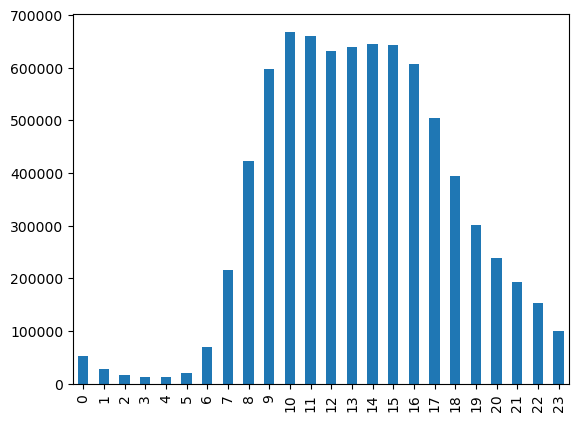

In [95]:
# Frequency of order hour of day ('order_hour_of_day')
bar_genx_hour = df_gen_x['order_hour_of_day'].value_counts().sort_index().plot.bar()

In [96]:
# Export bar chart into project folder
bar_genx_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'd_bar_genx_hour.png'))

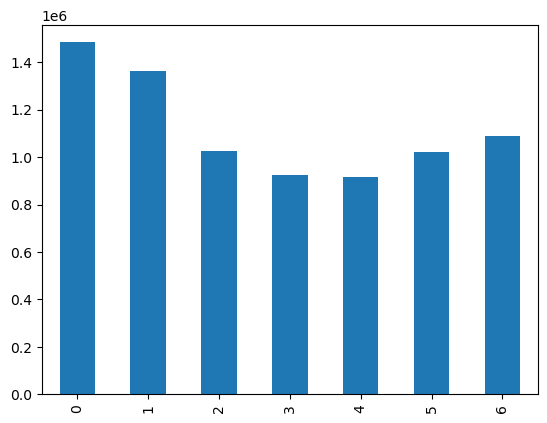

In [97]:
# Frequency of day of week ('order_day_of_week')
bar_genx_day = df_gen_x['order_day_of_week'].value_counts().sort_index().plot.bar()

In [98]:
# Export bar chart into project folder
bar_genx_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'd_bar_genx_day.png'))

### (e) Boomers and Older: Popular Departments + Products, and Ordering Habits

#### (i) Reviewing overall popular departments + products for Boomers and Older:

In [99]:
df_boom = ords_prods_all_flagged[ords_prods_all_flagged['gen_flag']== 'Boom and older']

In [100]:
# Frequency of orders by department for Millennials
pop_depts_boom = df_boom['department_id'].value_counts().rename_axis('department_id').reset_index(name='counts')

In [101]:
# Inner join merge 'pop_depts_mill' with 'depts'
df_pop_depts_boom = pop_depts_boom.merge(depts, on = 'department_id', indicator = True)

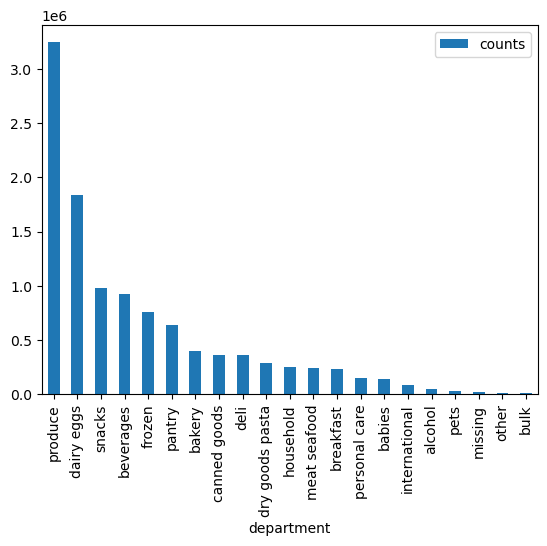

In [102]:
bar_pop_depts_boom = df_pop_depts_boom.plot.bar(x='department', y='counts')

In [103]:
# Export bar chart into project folder
bar_pop_depts_boom.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'e_bar_pop_depts_boom.png'))

In [104]:
df_pop_prods_boom = df_boom['product_name'].value_counts()

In [105]:
df_pop_prods_boom.head(5)

Banana                    160680
Bag of Organic Bananas    131506
Organic Strawberries       92079
Organic Baby Spinach       82189
Organic Hass Avocado       74538
Name: product_name, dtype: int64

#### (ii) Reviewing departments and products not food and beverage related:

In [106]:
df_boom_other = df_non_food[df_non_food['gen_flag']== 'Boom and older']

In [107]:
# Frequency of orders by department for Boom (non-food + non-bev items)
pop_depts_boom_other = df_boom_other['department_id'].value_counts().rename_axis('department_id').reset_index(name='counts')

In [108]:
# Inner join merge 'pop_depts_boom_other' with 'depts'
df_pop_boom_other = pop_depts_boom_other.merge(depts, on = 'department_id', indicator = True)

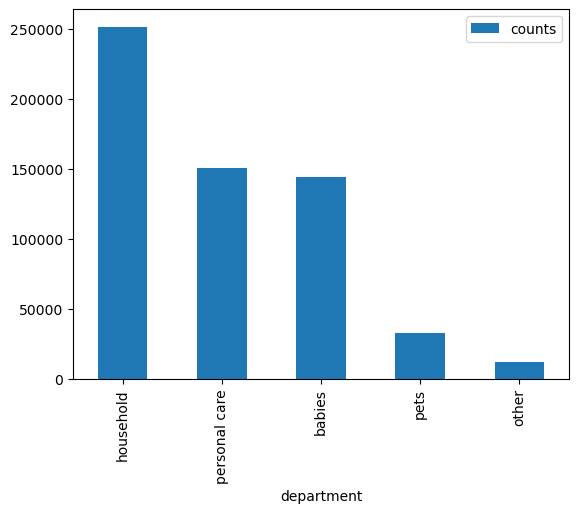

In [109]:
bar_pop_depts_boom_other = df_pop_boom_other.plot.bar(x='department', y='counts')

In [110]:
# Export bar chart into project folder
bar_pop_depts_boom_other.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'e_bar_pop_depts_boom_other.png'))

In [111]:
df_pop_prods_boom_other = df_boom_other['product_name'].value_counts()

In [112]:
df_pop_prods_boom_other.head()

100% Recycled Paper Towels                          9465
Sustainably Soft Bath Tissue                        6337
Aluminum Foil                                       3717
Natural Free & Clear Dish Liquid                    3336
Baby Food Stage 2 Blueberry Pear & Purple Carrot    2741
Name: product_name, dtype: int64

#### (iii) Looking at ordering habits (day of week and hour of day)

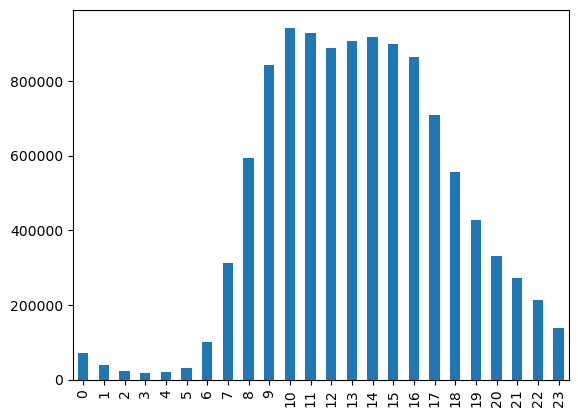

In [113]:
# Frequency of order hour of day ('order_hour_of_day')
bar_boom_hour = df_boom['order_hour_of_day'].value_counts().sort_index().plot.bar()

In [114]:
# Export bar chart into project folder
bar_boom_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'e_bar_boom_hour.png'))

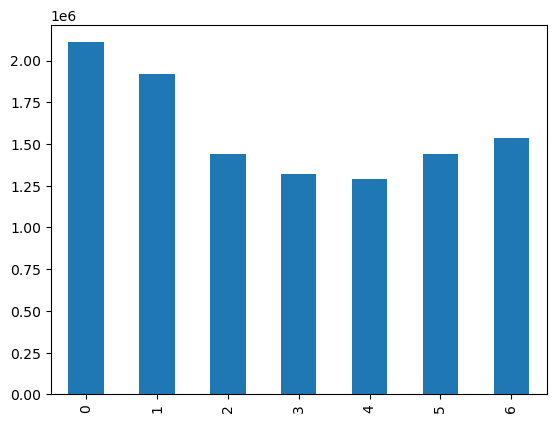

In [115]:
# Frequency of day of week ('order_day_of_week')
bar_boom_day = df_boom['order_day_of_week'].value_counts().sort_index().plot.bar()

In [116]:
# Export bar chart into project folder
bar_boom_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'e_bar_boom_day'))

## 4. Additional review of price variations based on day of week and income category

In [117]:
#Set the seed for the random number generator
np.random.seed(4)

In [118]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_all_flagged)) <= 0.7

In [119]:
# Store 70% of the sample in the dataframe big
big = ords_prods_all_flagged[dev]

In [120]:
# Store 30% of the sample in the dataframe small
small = ords_prods_all_flagged[~dev]

In [121]:
# Check results
len(ords_prods_all_flagged)

30959687

In [122]:
len(big) + len(small)

30959687

In [123]:
# Reduce sample to only necessary columns
df_2 = small[['order_day_of_week','prices','income_flag']]

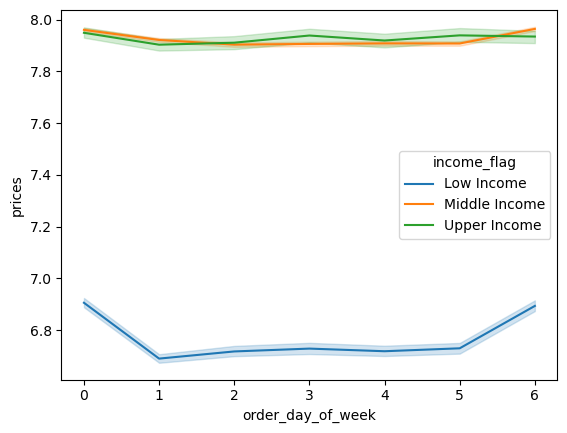

In [124]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices', hue = 'income_flag')

In [125]:
# Export bar chart into project folder
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_inc_price_day.png'))